## FINM 35910 - Applied Algorithmic Trading - Szajkowski, Jared
### Homework 2: Executing The Trading Strategy

### Python Imports

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Python Functions

In [15]:
# Import functions from .py files

# Function to combine the price data for the crypto assets
import combine_data_func

# Function to execute the strategy
import strategy_func

# Function to calcuate the summary stats
import summary_stats_func

# Functions to display plots
from plot_func import plot_cumulative_return
from plot_func import plot_values
from plot_func import plot_drawdown
from plot_func import plot_buy_hold
from plot_func import plot_price
from plot_func import plot_cum_trans_costs

### Question 1
1. Formulate Investment Hypothesis and Goals:
- Define the investment hypothesis and objectives, aiming for excess returns above the benchmark.

The investment objectives are two-fold. First, the fund seeks to provide the maximum total return by diversifying across crypto assets that are trending up in value. The fund is long only and seeks to take advantage of the volatility that has been present (and is expected to continue) in the crypto markets. Second, the fund seeks to minimize drawdowns by using a variety of trend following signals to reduce exposure to crypto assets that are trending down in value. As assets increase and decrease in value, the strategy rotates positions in and out of the various assets. Due to the volatile nature of crypto, there is value in reducing exposure as assets are declining in value to avoid a total loss should the value of an asset go to zero.

- Consider (if applicable) and detail various parameters like investment universe, return definition, rebalancing frequency, transaction costs, start and end dates of testing period.

The investment universe consists of crypto assets, to include initially Bitcoin and Ethereum. Other assets will be evaluated as historical data is available and evaluted to be included in the strategy. Rebalancing is set to take place every 10 days, but is subject to change based on the strategy performance and other considerations such as trading costs. Starting and ending dates for the backtesting period is from mid 2016 to the present. Return definition is the classic definition. The strategy tracks returns on a daily basis, which is is 365 days per year because crypto assets trade everyday, 24 hours per day.

- State the benchmark, if applicable.

The benchmark to be compared to is a buy-and-hold allocation to each of the crypto assets that is being used in the strategy. The comparison to the benchmark is shown below in the plots. Given that the trend following strategy is essentially attempting to reduce the volatility inherent to crypto assets while matching or beating the returns, it makes the most sense to use a benchmark such as the a buy-and-hold allocation.

- Define clear and testable hypotheses for the strategy, including specific entry and exit criteria.

The entry and exit criteria are determined based on a a "trend strength" indicator that is determined by evaluating whether an asset is trending up or down based on whether or not the current price is higher or lower than the 10, 20, ... , 90 day exponential moving averages. If the current price is higher than a specific EMA traunch, then the indicator is considered a +1. If it is lower, then the indicator is considered a 0. The indicator is determined through this method and the level of the indicator determines the allocation to the asset. As previously mentioned the portfolio is rebalanced daily, which allows for reaction to recent market events and movements, but also incurs higher transaction costs. The strategy does not short sell due to the limitations of Coinbase, but it would be worthwhile to investigate in the future if put options could be used as a proxy for short selling.

- Discuss market impact and liquidity concerns/constraints when setting objectives.

Based on the volumes available from the chosen exchange (Coinbase), liquidity and market depth is not an issue for a reasonable portfolio size ( < $50m).

### Question 2
2. Portfolio Construction and Rebalancing:
- Construct the portfolio using historical or simulated data. If simulated, please explain the choice and detail the steps.

The portfolio is constructed using historical data available from Coinbase. The data is pulled from coinbase with a python script and then stored locally for easy access, use, and updating later on. The data to be used is the 24 hour candle data, but the strategy uses the 24 hour close/adjusted close prices.

- Discuss any data preprocessing steps, if applicable.

Not applicable to this trading strategy.

- Incorporate transaction cost models that simulate real market conditions, including bid-ask spreads and market impact.

Transaction costs are typically steep when trading crypto assests (at least on Coinbase), but Coinbase does provide a subscription offering that allows for unlimited trading with zero fees. However, the following are the published trading costs that are provided by Coinbase:

https://help.coinbase.com/en/exchange/trading-and-funding/exchange-fees

![Coinbase Trading Fees](Coinbase_Trading_Fees.png)

For our purposes, we will use 50 basis points (the average of the maker and taker fees), and use the assumption that 50% of the time we are the taker and 50% of the time we are the maker.

- Execute the strategy.

See below.

- Discuss, if applicable, rebalancing frequencies such as monthly, quarterly, or custom intervals.

Given that crypto exchanges trade 24 hrs / day, the idea is that the strategy is run daily directly after the close of the 24 hour period, and any rebalancing is done immediately at that time. This means that any rebalancing will take place within seconds, literally, of what the close price is for the previous 24 hours. This gives assurances that using the close/adjusted close price for the strategy backtest is a valid method and that the strategy will not incure signficant slippage or loss due to crossing bid-ask spreads.

- Other considerations not required but helpful:
    * Explore alternative data sources, such as social media sentiment, to enhance trading signal accuracy, if desired.
    * Consider portfolio optimization techniques like Mean-Variance Optimization or Risk Parity to achieve optimal asset allocation, if applicable.

In [16]:
# Executing The Strategy 

# List of EMA / SMA intervals
sma_list = [str(i) for i in range(10, 91, 10)] # This produces a list ... ['10', '20', '30', '40', ... , '90']

# Number of EMA / SMA intervals
num_sma = len(sma_list)

# List of funds to be used
# fund_list = ['BTC-USD', 'ETH-USD', 'BCH-USD', 'LINK-USD', 'LTC-USD']
fund_list = ['BTC-USD', 'ETH-USD']

# Number of funds
num_funds = len(fund_list)

# Starting cash contribution
starting_cash = 10000

# Monthly cash contribution
cash_contrib = 0

# Combine price data for each asset
combine_data_func.combine_data(fund_list, 'Daily')

# Rebalance interval
rebal_interval = 10

# Transaction fee
transaction_fee = 0.005

# Execute strategy
strat = strategy_func.strategy(sma_list, num_sma, num_funds, fund_list, starting_cash, cash_contrib, rebal_interval, transaction_fee).set_index('Date')

# Calculate summary stats
sum_stats = summary_stats_func.summary_stats(fund_list, strat[['Return']], 'Daily')

# Display summary stats
display(sum_stats)

Combine data complete for BTC-USD_ETH-USD.
Strategy complete for BTC-USD_ETH-USD.
Summary stats complete for BTC-USD_ETH-USD.


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,CAGR,Daily Max Return,Daily Max Return (Date),Daily Min Return,Daily Min Return (Date),Max Drawdown,Peak,Bottom,Recovery Date
Return,0.8323,0.5280,1.5764,0.9997,0.1881,2017-12-12,-0.1654,2021-01-21,-0.5795,2018-01-13,2019-01-13,2019-06-25


### Question 3
3. Evaluate Backtesting Results:
- Provide all the following metrics if applicable: Total Return, Number of transactions, Average gain/loss per transaction, Maximum Drawdown, Sharpe Ratio, Tracking Error, Information Ratio, Treynor Ratio, and Jensen's Alpha. If any metrics are considered inapplicable, explain why.

With the above summary statistics for the strategy, we can find the following:

In [17]:
# Total Return
cum_ret = strat.iloc[-1]['Cumulative_Return']
print("Cumulative Return: ", round(cum_ret, 2))

# Number Of Transactions
count = (strat['Total_Transaction_Costs'] > 0).sum()
print("Number Of Transactions:", count)

# Maximum Drawdown
rolling_max = strat['Total_Value'].cummax()
drawdown = (strat['Total_Value'] - rolling_max) / rolling_max * 100
dd = drawdown.min()
print("Maximum Drawdown: ", round(dd, 2))

# Sharpe Ratio
print("Sharpe Ratio: ", round(sum_stats['Annualized Sharpe Ratio'][0], 2))

# Tracking Error & Information Ratio
benchmark = pd.DataFrame(index = strat.index)
for fund in fund_list:
    col_name = fund + "_Close"
    benchmark = benchmark.join(strat[[col_name]])
    benchmark[fund + "_Return"] = benchmark[fund + "_Close"].pct_change()

active_return = strat['Return'] - benchmark['BTC-USD_Return']
mean_active_return = active_return.mean()
tracking_error = active_return.std()
print("Tracking Error For BTC-USD As Benchmark: ", round(tracking_error, 4))
information_ratio = active_return.mean() / tracking_error
print("Information Ratio: ", round(information_ratio, 4))

active_return = strat['Return'] - benchmark['ETH-USD_Return']
mean_active_return = active_return.mean()
tracking_error = active_return.std()
print("Tracking Error For ETH-USD As Benchmark: ", round(tracking_error, 4))
information_ratio = active_return.mean() / tracking_error
print("Information Ratio: ", round(information_ratio, 4))

Cumulative Return:  359.11
Number Of Transactions: 283
Maximum Drawdown:  -57.95
Sharpe Ratio:  1.58
Tracking Error For BTC-USD As Benchmark:  0.0272
Information Ratio:  -0.0047
Tracking Error For ETH-USD As Benchmark:  0.035
Information Ratio:  -0.0228


The above values for tracking error and information ratio do not seem valid for the strategy return data. This could be an issue with using daily return data as opposted to weekly or monthly data, but that would need to be investigated further.

In [18]:
# Treynor Ratio Using BTC-USD As Benchmark
returns_df = pd.merge(strat['Return'], benchmark['BTC-USD_Return'], on= "Date" )
cov_matrix = returns_df[['Return', 'BTC-USD_Return']].cov()
cov_strategy_market = cov_matrix.loc['Return', 'BTC-USD_Return']
var_market = returns_df['BTC-USD_Return'].var()
beta = cov_strategy_market / var_market
print("Beta To BTC-USD Benchmark: ", beta)
treynor_ratio = (strat['Return'].mean() - 0) / beta # Assuming risk free rate of 0
print("Treynor Ratio For BTC-USD Benchmark: ", treynor_ratio)

# Treynor Ratio Using ETH-USD As Benchmark
returns_df = pd.merge(strat['Return'], benchmark['ETH-USD_Return'], on= "Date" )
cov_matrix = returns_df[['Return', 'ETH-USD_Return']].cov()
cov_strategy_market = cov_matrix.loc['Return', 'ETH-USD_Return']
var_market = returns_df['ETH-USD_Return'].var()
beta = cov_strategy_market / var_market
print("Beta To ETH-USD Benchmark: ", beta)
treynor_ratio = (strat['Return'].mean() - 0) / beta # Assuming risk free rate of 0
print("Treynor Ratio For ETH-USD Benchmark: ", treynor_ratio)

Beta To BTC-USD Benchmark:  0.5076234668618236
Treynor Ratio For BTC-USD Benchmark:  0.004491936571864208
Beta To ETH-USD Benchmark:  0.4113077931431573
Treynor Ratio For ETH-USD Benchmark:  0.005543810386154019


From the above, we can see that the Treynor Ratio is positive for both benchmarks, which tells us that the strategy is providing positive risk adjusted returns. Note that the above values are for daily returns, so the annualized Treynor Ratio would be higher (as expected).

In [19]:
# Jensen's Alpha Using BTC-USD As Benchmark
returns_df = pd.merge(strat['Return'], benchmark['BTC-USD_Return'], on= "Date" )
cov_matrix = returns_df[['Return', 'BTC-USD_Return']].cov()
cov_strategy_market = cov_matrix.loc['Return', 'BTC-USD_Return']
var_market = returns_df['BTC-USD_Return'].var()
beta = cov_strategy_market / var_market
alpha = returns_df['Return'].mean() - beta * returns_df['BTC-USD_Return'].mean()
print("Alpha To BTC-USD Benchmark: ", round(alpha, 5))

# Jensen's Alpha Using ETH-USD As Benchmark
returns_df = pd.merge(strat['Return'], benchmark['ETH-USD_Return'], on= "Date" )
cov_matrix = returns_df[['Return', 'ETH-USD_Return']].cov()
cov_strategy_market = cov_matrix.loc['Return', 'ETH-USD_Return']
var_market = returns_df['ETH-USD_Return'].var()
beta = cov_strategy_market / var_market
alpha = returns_df['Return'].mean() - beta * returns_df['ETH-USD_Return'].mean()
print("Alpha To ETH-USD Benchmark: ", round(alpha, 5))

Alpha To BTC-USD Benchmark:  0.00106
Alpha To ETH-USD Benchmark:  0.00101


Again, the above values are for daily returns. Annualizing these values put the alpha for both benchmarks at ~38%.

In [20]:
# Calculate summary stats
sum_stats = summary_stats_func.summary_stats(fund_list, strat[['Return']], 'Daily')
benchmark_btc = benchmark[['BTC-USD_Return']]
benchmark_btc.rename(columns = {'BTC-USD_Return':'Return'}, inplace = True)
bm_btc_sum_stats = summary_stats_func.summary_stats(fund_list, benchmark_btc[['Return']], 'Daily')
benchmark_eth = benchmark[['ETH-USD_Return']]
benchmark_eth.rename(columns = {'ETH-USD_Return':'Return'}, inplace = True)
bm_eth_sum_stats = summary_stats_func.summary_stats(fund_list, benchmark_eth[['Return']], 'Daily')

combined_stats = pd.concat([sum_stats, bm_btc_sum_stats, bm_eth_sum_stats], ignore_index=True)
combined_stats.index = ['Strategy Return', 'BTC-USD Benchmark Return', 'ETH-USD Benchmark Return']
combined_stats

Summary stats complete for BTC-USD_ETH-USD.
Summary stats complete for BTC-USD_ETH-USD.
Summary stats complete for BTC-USD_ETH-USD.


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,CAGR,Daily Max Return,Daily Max Return (Date),Daily Min Return,Daily Min Return (Date),Max Drawdown,Peak,Bottom,Recovery Date
Strategy Return,0.8323,0.5280,1.5764,0.9997,0.1881,2017-12-12,-0.1654,2021-01-21,-0.5795,2018-01-13,2019-01-13,2019-06-25
BTC-USD Benchmark Return,0.8790,0.7166,1.2266,0.8589,0.2720,2017-07-20,-0.3881,2020-03-12,-0.8380,2017-12-16,2018-12-15,2020-11-30
ETH-USD Benchmark Return,1.1236,0.9743,1.1532,0.9129,0.3259,2017-12-12,-0.4332,2020-03-12,-0.9401,2018-01-13,2018-12-14,2021-01-24


- Utilize graphical representations, including cumulative performance charts and other visualizations, for a comprehensive analysis.

The following plots provide graphical views on the strategy and it's performance, starting with the cumulative return for the strategy as well as the benchmark returns.

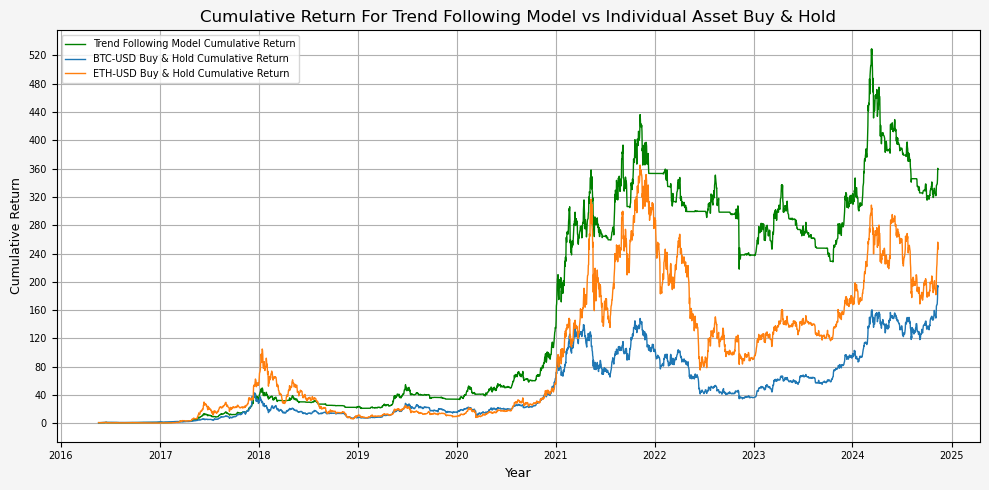

In [21]:
plot_cumulative_return(strat, fund_list)

Similarly, as follows is a plot to compare the portfolio values with an assumed initial $10,000 allocation.

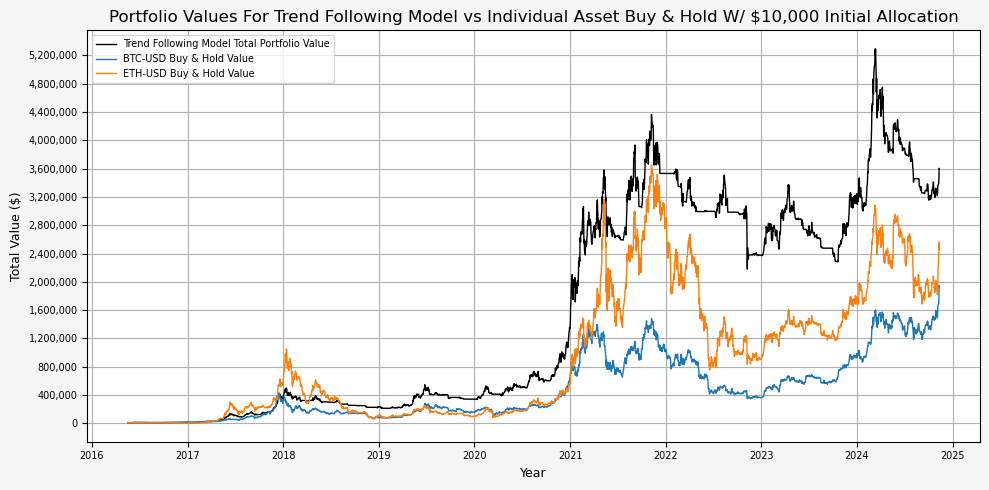

In [22]:
plot_buy_hold(strat, fund_list)

Next, we have the plot that shows the drawdowns for the strategy as well as the two benchmarks.

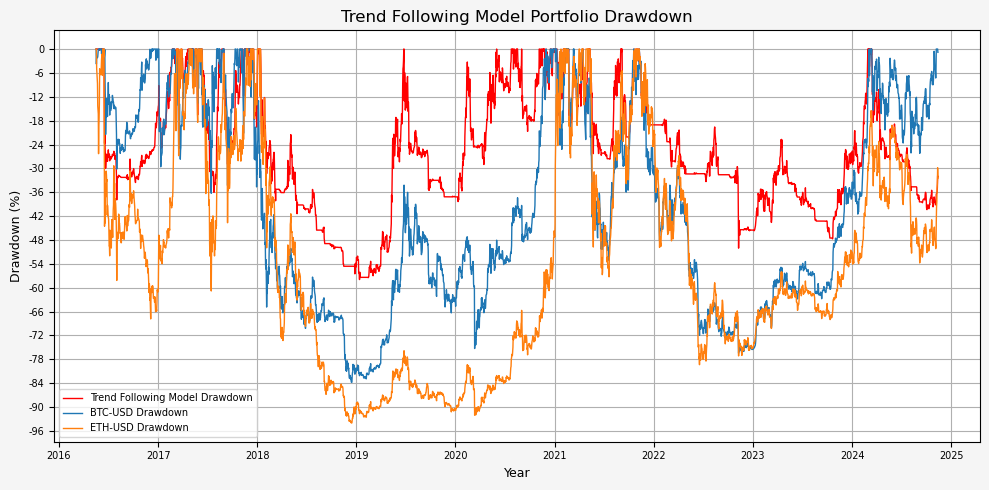

In [23]:
plot_drawdown(strat, fund_list)

Next, we have the plot showing the total portfolio value alongside the cash value and "equity" value. Of course here when we use the term "equity" it is synonymous with the crypto asssets.

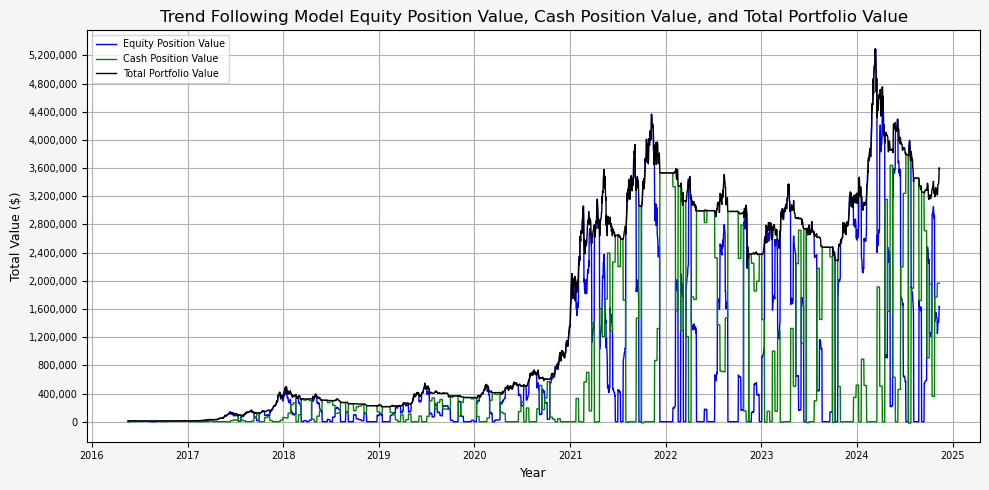

In [24]:
plot_values(strat)

And finally, we have the plot showing the cumulative transaction / trading costs for the life of the strategy. It can be seen that the transaction costs become substantial in value, and additional investigation would be needed to determine if the strategy is overtrading and needs to be modified to reduce the trading costs while still maintaining the alpha and relatively uncorrelated returns.

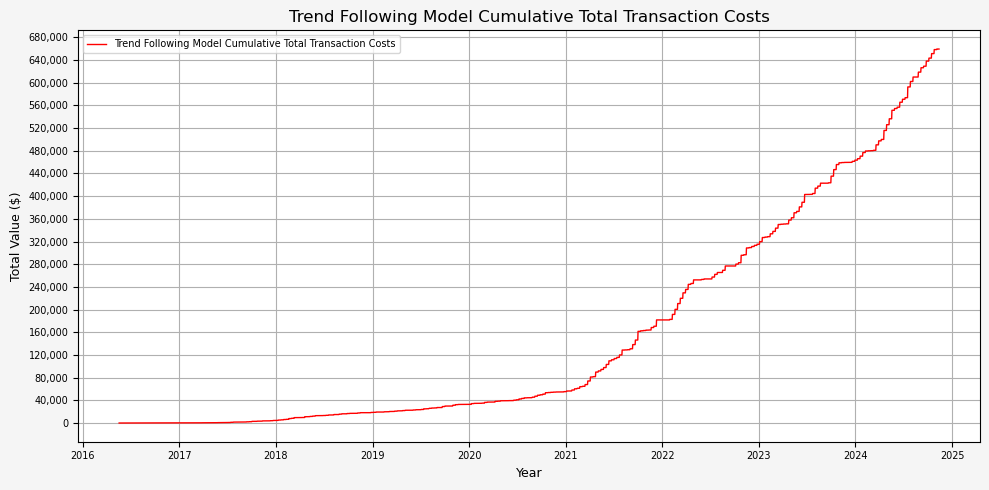

In [25]:
plot_cum_trans_costs(strat)

- Other considerations not required but helpful:
    * Consider quantitative and qualitative factors, such as scenario analysis and stress testing, to enhance result interpretation, if desired.
    * Perform robustness checks by altering key parameters within a reasonable range to assess the strategy's sensitivity, if desired.
    * Consider advanced risk management techniques, such as Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), to measure extreme downside risks, if desired or pertinent/applicable to trading strategies.

The next phase of the exploration of the trading strategy will consist of fine tuning the trend following duration and rebalancing parameters, which will be discussed in homework #3.